In [ ]:
#necessary Libraries
import numpy as np
import pandas as pd
import time
import pprint

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# magic word for producing visualizations in notebook
%matplotlib inline

#Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from scipy.sparse import lil_matrix

#Models
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

#Scoring Metrics
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import accuracy_score

In [3]:
# Load the dataset
file_path = r'C:\Users\Admin\PycharmProjects\Thesis2.0\django_thesis\Dataset\trainingData.csv'
trainingData = pd.read_csv(file_path)

In [4]:
# Check the structure of the data after it's loaded 
#(print the number of rows and columns).
num_rows, num_cols  = trainingData.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 529
Number of rows: 19937


In [5]:
#check the statistics of the data per columns
trainingData.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [6]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [7]:
#Check the columns names
col_names = trainingData.columns.values
col_names

array(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006',
       'WAP007', 'WAP008', 'WAP009', 'WAP010', 'WAP011', 'WAP012',
       'WAP013', 'WAP014', 'WAP015', 'WAP016', 'WAP017', 'WAP018',
       'WAP019', 'WAP020', 'WAP021', 'WAP022', 'WAP023', 'WAP024',
       'WAP025', 'WAP026', 'WAP027', 'WAP028', 'WAP029', 'WAP030',
       'WAP031', 'WAP032', 'WAP033', 'WAP034', 'WAP035', 'WAP036',
       'WAP037', 'WAP038', 'WAP039', 'WAP040', 'WAP041', 'WAP042',
       'WAP043', 'WAP044', 'WAP045', 'WAP046', 'WAP047', 'WAP048',
       'WAP049', 'WAP050', 'WAP051', 'WAP052', 'WAP053', 'WAP054',
       'WAP055', 'WAP056', 'WAP057', 'WAP058', 'WAP059', 'WAP060',
       'WAP061', 'WAP062', 'WAP063', 'WAP064', 'WAP065', 'WAP066',
       'WAP067', 'WAP068', 'WAP069', 'WAP070', 'WAP071', 'WAP072',
       'WAP073', 'WAP074', 'WAP075', 'WAP076', 'WAP077', 'WAP078',
       'WAP079', 'WAP080', 'WAP081', 'WAP082', 'WAP083', 'WAP084',
       'WAP085', 'WAP086', 'WAP087', 'WAP088', 'WAP089', 'WAP0

In [8]:
#check for missing values
missing_values_count = trainingData.isnull().sum()
#uncomment this if you want to see the count of missing data per column
#missing_values_count

# how many total missing values do we have?
total_cells = np.product(trainingData.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
missing_percent = (total_missing/total_cells) * 100

print('Percent of missing data = {}%'.format(missing_percent))

Percent of missing data = 0.0%


In [9]:
#Assess unique values per building columns
unique_floors = trainingData["FLOOR"].unique()
unique_bldgs = trainingData["BUILDINGID"].unique()
unique_spaceid = trainingData["SPACEID"].unique()
unique_rpos = trainingData["RELATIVEPOSITION"].unique()
unique_users = trainingData["USERID"].unique()
print('Unique Floors : {}'.format(unique_floors))
print('Unique Buildings : {}'.format(unique_bldgs))
print('Unique Space IDs : {}'.format(unique_spaceid))
print('Unique Relative Positions : {}'.format(unique_rpos))
print('Unique Users : {}'.format(unique_users))

Unique Floors : [2 0 3 4 1]
Unique Buildings : [1 0 2]
Unique Space IDs : [106 103 102 122 105 101 112 104 110 108 109 111 107  15  29 117  16  28
  22  10   2   4   3   5   6   9  27   8   7  26  18 216  17 217 247 248
 246 245 244 243 242 241 240 201 202 204 203 205 207 206 209 211 208 210
 212 214 213 215 121 219 221 222 218 220 250 223 225 224 229 226 227 228
 233 231 230 232 236 235 234 237 238 239 141 140 143 113 114 116 115 120
 118 128 119 129 125 124 131 127 132 126 133 134 137 135 136 253 254 123
 130 138 139 142 146 147 249 144   1  30  25  13  12  11  14]
Unique Relative Positions : [2 1]
Unique Users : [ 2 11  3  4  5  6  7  8  9 16 10 12 13 14 15  1 17 18]


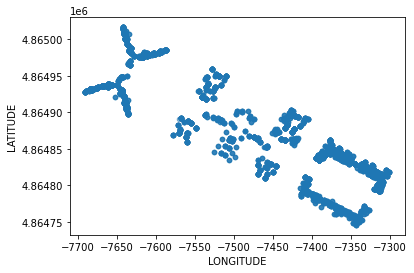

In [10]:
#Map the data i.e. see the campus
trainingData.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.2)
plt.savefig('data_map.png')

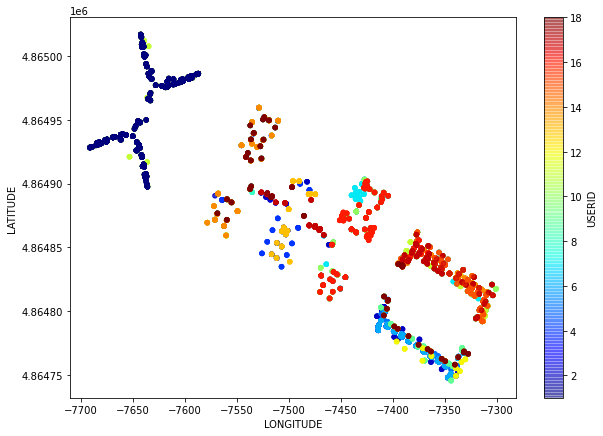

In [11]:
#map the data by user ID
#i.e. see how much of the information in each building was collected by how many users
trainingData.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4, figsize=(10,7),
    c="USERID", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.savefig('user_map2.png')

<AxesSubplot:>

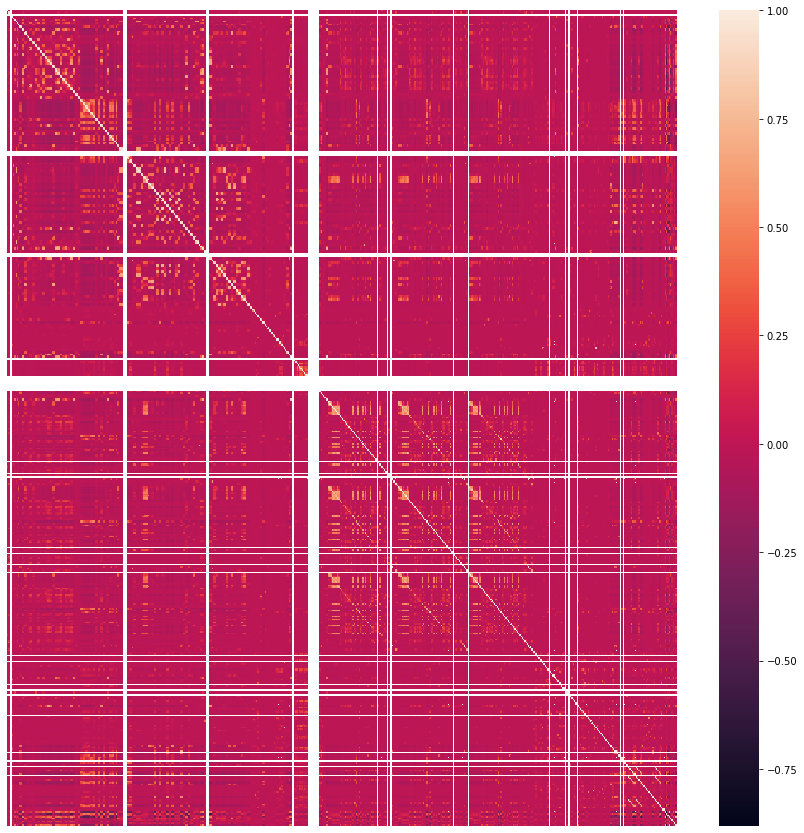

In [16]:
# plot the correlations between the WAP features
corr_matrix = trainingData.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,xticklabels=False, yticklabels=False)

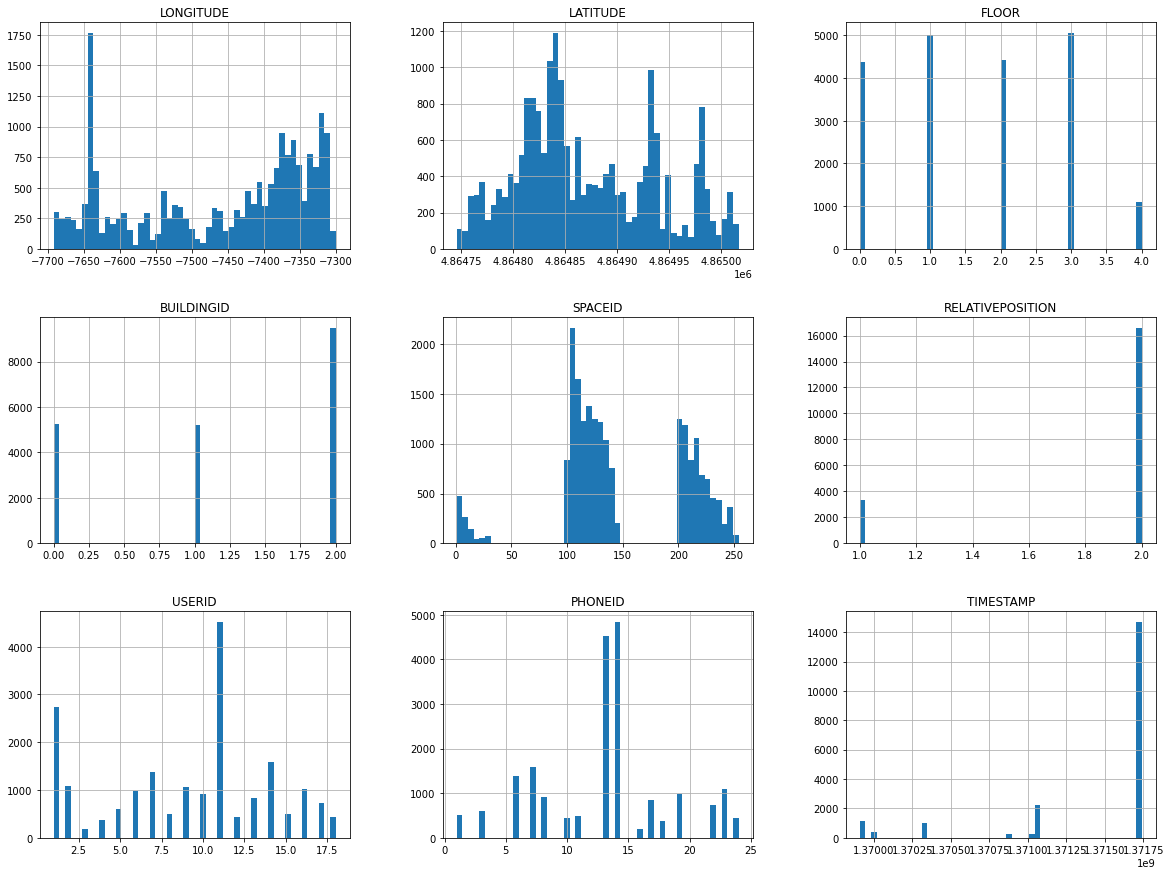

In [17]:
# plot the histograms of the attributes
trainingData.iloc[:, 520:529].hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

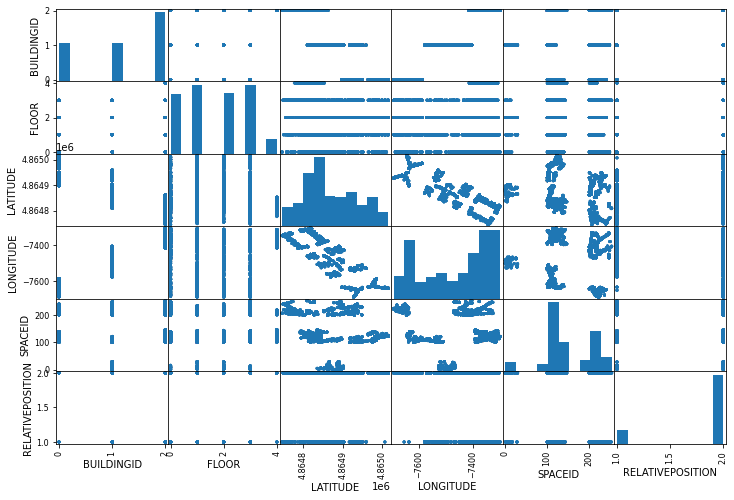

In [18]:
attributes = ["BUILDINGID","FLOOR", "LATITUDE", "LONGITUDE", "SPACEID", "RELATIVEPOSITION"]
scatter_matrix(trainingData[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

In [20]:
def clean_data(df):
    """
    Perform feature trimming, and engineering for trainingData
    Will also be applied to validationData
    
    INPUT: trainingData DataFrame
    OUTPUT: Trimmed and cleaned trainingData DataFrame
    """
    
    # Reverse the representation for the values. 100=0 and teh values range from 0-105 (weakest to strongest)
    #"The intensity values are represented as negative integer values ranging -104dBm (extremely poor signal) to 0dbM.
    #The positive value 100 is used to denote when a WAP was not detected."
    df.iloc[:, 0:520] = np.where(df.iloc[:, 0:520] <= 0, 
                df.iloc[:, 0:520] + 105, 
                df.iloc[:, 0:520] - 100)
    
    # remove selected columns... 
    columns_removed = ['USERID', 'PHONEID','TIMESTAMP']
    for col in columns_removed:
        df.drop(col, axis=1, inplace=True)
    
   
    # Return the cleaned dataframe.
    return df 

In [21]:
#Apply Cleaning

trainingData  = clean_data(trainingData)

In [22]:
def preprocess_data(df):
    """
    Separates trainingData into Features and Targets
    Will also be applied to validationData
    
    INPUT: Cleaned trainingData DataFrame
    OUTPUT: trainingData as Features and Targets
    """
    
    global X
    global y
    # split the data set into features and targets(Floor and BuildingID)
    X = df.drop(['LONGITUDE', 'LATITUDE','FLOOR','BUILDINGID', 'SPACEID','RELATIVEPOSITION'], axis=1)
    y = df[['BUILDINGID', 'FLOOR']]
    
    
    #create Dummies for the targets to feed into the model
    y = pd.get_dummies(data=y, columns=['BUILDINGID', 'FLOOR'])
    
    
    return X, y

In [23]:
#Apply preprocessing

X, y = preprocess_data(trainingData)

In [24]:
def split_data(preprocess_data):
# TO AVOID OVERFITTING: Split the training data into training and testing sets 
    global X_train
    global X_test
    global y_train
    global y_test
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.2, 
                                                        random_state = 42,
                                                        shuffle=True)

    # Show the results of the split
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    return X_train, X_test, y_train, y_test

In [25]:
#Apply split data

X_train, X_test, y_train, y_test = split_data(preprocess_data)

Training set has 15949 samples.
Testing set has 3988 samples.


In [26]:
#Scale Data with Standard Scaler

scaler = StandardScaler()

#Fit only the training set
#this will help us transform the validation data 
scaler.fit(X_train)
    
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#Apply PCA while keeping 95% of the variation in the data
pca = PCA(.95)

    
#Fit only the training set    
pca.fit(X_train)

# Apply PCA transform to both the training set and the test set.    
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Number of PCA Components = {}.".format(pca.n_components_))
#print(pca.n_components_)
print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))
#print(pca.explained_variance_ratio_.sum())

Number of PCA Components = 258.
Total Variance Explained by PCA Components = 0.9501844395759897.


In [28]:
def pca_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
pca_plot(pca)

In [29]:
#Create sparse matrices to run the scikit multilearn algorithms

X_train_pca = lil_matrix(X_train_pca).toarray()
y_train = lil_matrix(y_train).toarray()
X_test_pca = lil_matrix(X_test_pca).toarray()
y_test = lil_matrix(y_test).toarray()